In [14]:
# Parte 1 + 2a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dados\MICRODADOS_ENEM_2022.csv', sep= ';', encoding= 'ISO-8859-1')
filtro_treineiro = df['IN_TREINEIRO'] == 0
filtro_presenca_CN = df['TP_PRESENCA_CN'] == 1
filtro_presenca_CH = df['TP_PRESENCA_CH'] == 1
filtro_presenca_LC = df['TP_PRESENCA_LC'] == 1
filtro_presenca_MT = df['TP_PRESENCA_MT'] == 1
filtro_redacao= df['TP_STATUS_REDACAO'] == 1

filtros_agrupados = filtro_treineiro & filtro_presenca_CN & filtro_presenca_CH & filtro_presenca_LC & filtro_presenca_MT & filtro_redacao
df_filtrado = df[filtros_agrupados]

# agrupa por tipo (nesse caso pela renda) e faz a média das notas de cada competência, ai o gráfico fica renda por média de nota em cada competência
media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

C:\Users\esthe\AppData\Local\Temp\ipykernel_2404\3575511484.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


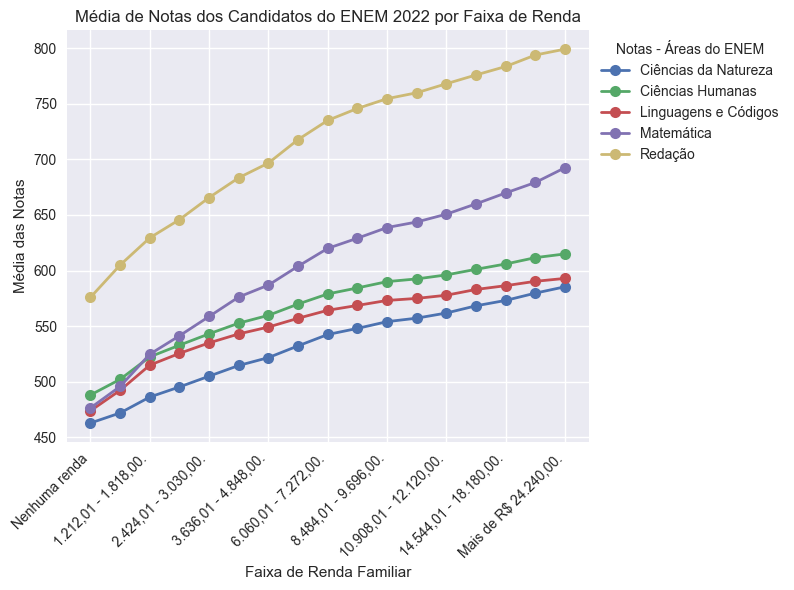

In [15]:
# # Mapeia os códigos das faixas de renda para os rótulos personalizados

faixas_de_renda = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 1.212,00',
    'C': '1.212,01 - 1.818,00.',
    'D': '1.818,01 - 2.424,00.',
    'E': '2.424,01 - 3.030,00.',
    'F': '3.030,01 - 3.636,00.',
    'G': '3.636,01 - 4.848,00.',
    'H': '4.848,01 - 6.060,00.',
    'I': '6.060,01 - 7.272,00.',
    'J': '7.272,01 - 8.484,00.',
    'K': '8.484,01 - 9.696,00.',
    'L': '9.696,01 - 10.908,00.',
    'M': '10.908,01 - 12.120,00.',
    'N': '12.120,01 - 14.544,00.',
    'O': '14.544,01 - 18.180,00.',
    'P': '18.180,01 - 24.240,00.',
    'Q': 'Mais de R$ 24.240,00.'
    
}

# # Renomeia os índices do DataFrame com os rótulos personalizados
media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)

plt.style.use('seaborn')
plt.figure(figsize=(8,6))

# Cria o gráfico de linhas
media_notas_por_renda.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

# Configurações adicionais
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Média das Notas')
plt.title('Média de Notas dos Candidatos do ENEM 2022 por Faixa de Renda')

# Legenda personalizada
legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [27]:
# Parte 2b
media_disciplina = media_notas_por_renda
media_das_medias = media_disciplina.mean()
desvio_padrao = media_disciplina.std()
d_cohen = (media_disciplina - media_das_medias) / desvio_padrao


                        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
Q006                                                                     
Nenhuma renda            -1.830034   -2.054501   -2.270010   -1.937216   
Até R$ 1.212,00          -1.593508   -1.690402   -1.741673   -1.640754   
1.212,01 - 1.818,00.     -1.219268   -1.167226   -1.093094   -1.196559   
1.818,01 - 2.424,00.     -0.982607   -0.894940   -0.789602   -0.942452   
2.424,01 - 3.030,00.     -0.729430   -0.630251   -0.519181   -0.675962   
3.030,01 - 3.636,00.     -0.478238   -0.381764   -0.288175   -0.407540   
3.636,01 - 4.848,00.     -0.293316   -0.199787   -0.111148   -0.243190   
4.848,01 - 6.060,00.     -0.017584    0.063091    0.114948    0.016550   
6.060,01 - 7.272,00.      0.249288    0.298559    0.320844    0.262920   
7.272,01 - 8.484,00.      0.392173    0.438347    0.445584    0.402908   
8.484,01 - 9.696,00.      0.550866    0.585437    0.574160    0.549989   
9.696,01 - 10.908,00.     0.632922    

C:\Users\esthe\AppData\Local\Temp\ipykernel_2404\1094519064.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


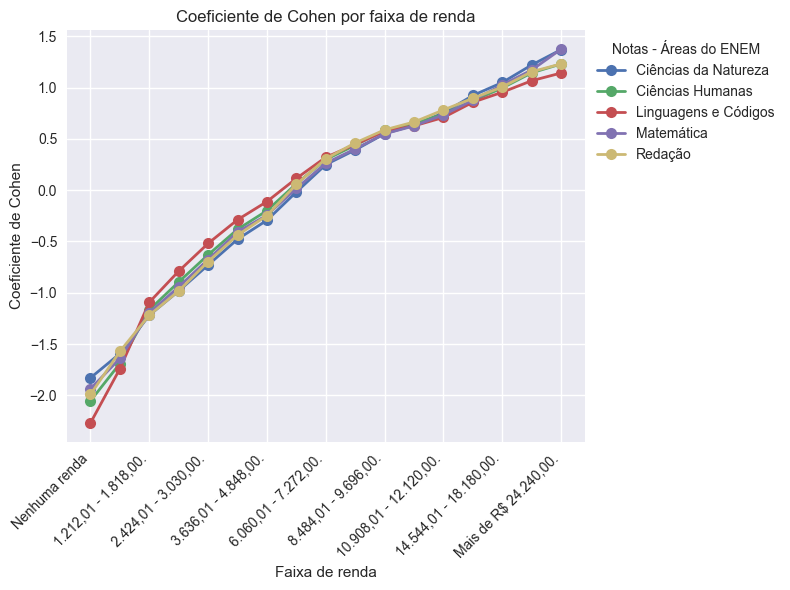

In [17]:


plt.style.use('seaborn')
plt.figure(figsize=(8,6))
d_cohen.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

plt.xlabel('Faixa de renda')
plt.ylabel('Coeficiente de Cohen')
plt.title('Coeficiente de Cohen por faixa de renda')

legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.show()

In [24]:
# Parte 3
# Contas 

filtro_computadores_nenhum = df_filtrado['Q024'] == 'A'
filtro_computadores_dois = df_filtrado['Q024'] == 'C'
filtro_computadores = filtro_computadores_nenhum | filtro_computadores_dois
df_computadores = df_filtrado[filtro_computadores]
df_filtrado_computadores_nenhum = df_filtrado[filtro_computadores_nenhum]
df_filtrado_computadores_dois = df_filtrado[filtro_computadores_dois]
medias_computadores = df_computadores.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
medias_computadores_nenhum = df_filtrado_computadores_nenhum.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
medias_computadores_dois = df_filtrado_computadores_dois.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

# Nenhum computador
media_disciplina_0pc = medias_computadores_nenhum
media_das_medias_0pc = medias_computadores.mean()
desvio_padrao_0pc = medias_computadores.std()
d_cohen_0pc = (media_disciplina_0pc - media_das_medias_0pc) / desvio_padrao_0pc
df_0pc = pd.DataFrame(d_cohen_0pc, index=faixas_de_renda)

# Dois computadores
media_disciplina_2pc = medias_computadores_dois
media_das_medias_2pc = medias_computadores.mean()
desvio_padrao_2pc = medias_computadores.std()
d_cohen_2pc = (media_disciplina_2pc - media_das_medias_2pc) / desvio_padrao_2pc
df_2pc = pd.DataFrame(d_cohen_2pc, index=faixas_de_renda)




C:\Users\esthe\AppData\Local\Temp\ipykernel_2404\630704035.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 800x550 with 0 Axes>

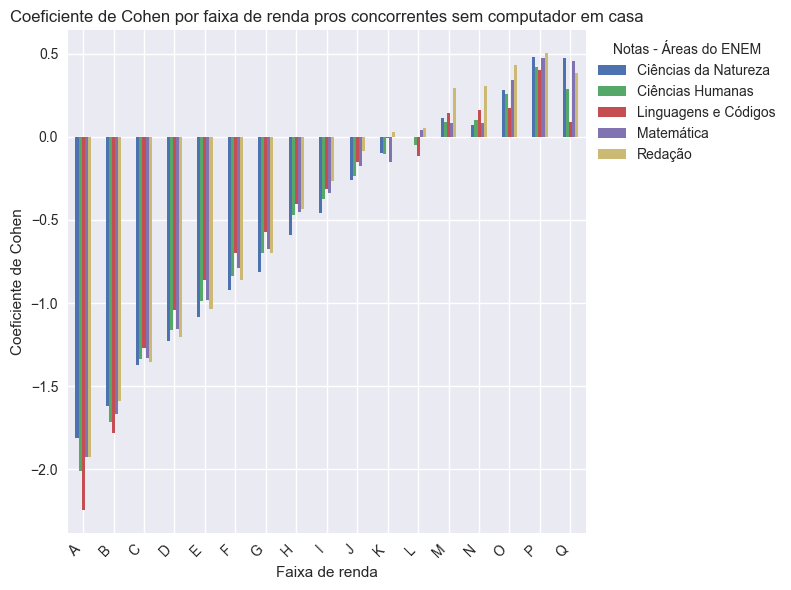

In [33]:




plt.style.use('seaborn')
plt.figure()
d_cohen_0pc.plot.bar(figsize = (8,6))

plt.xlabel('Faixa de renda')
plt.ylabel('Coeficiente de Cohen')
plt.title('Coeficiente de Cohen por faixa de renda pros concorrentes sem computador em casa')

legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.show()


C:\Users\esthe\AppData\Local\Temp\ipykernel_2404\1168381192.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 800x550 with 0 Axes>

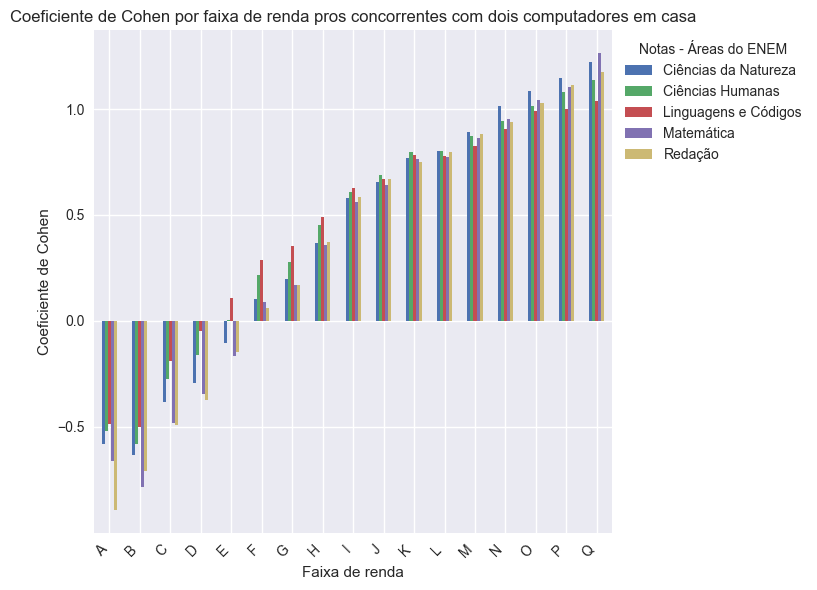

In [20]:
# Parte 3 - Tem dois computadores

plt.style.use('seaborn')
plt.figure()
d_cohen_2pc.plot.bar(figsize = (8,6))

plt.xlabel('Faixa de renda')
plt.ylabel('Coeficiente de Cohen')
plt.title('Coeficiente de Cohen por faixa de renda pros concorrentes com dois computadores em casa')

legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.show()
